In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

### Initial Exploration of Data

In [2]:
national_covid_df = pd.read_csv('nation_level_daily.csv')

In [3]:
national_covid_df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


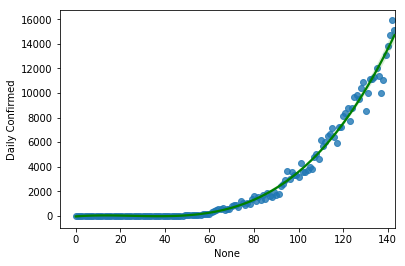

In [4]:
scatter_nation_daily = sns.regplot(x = national_covid_df.index, y = national_covid_df["Daily Confirmed"], order=3, line_kws={'color': 'green'})
plt.show()

We can see that the trend line is steeping up! We will try to map nifty 50 index and see how it works. 

In [5]:
nifty50_df = pd.read_csv('data.csv')

In [6]:
nifty50_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,01-Feb-2020,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
3,03-Feb-2020,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
4,04-Feb-2020,11786.25,11986.15,11783.40,11979.65,560430291,22338.50


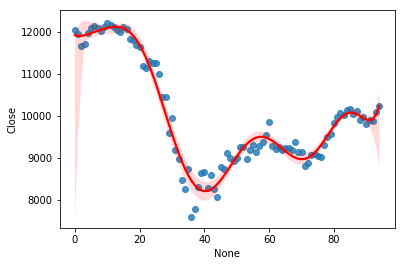

In [7]:
scatter_nifty50 = sns.regplot(x = nifty50_df.index, y = nifty50_df.Close, order=11, line_kws={'color': 'red'})

we will now superimpose these two plots to see if covid and nifty50 has any realtion.

In order to superimpose the two graphs we need to make sure that we take the same dates from both the data frames. There were days when stock market was closed but unfortunately covid-19 has not taken any pause.

### Data Cleaning

In [8]:
national_covid_df.Date

0       30 January 
1       31 January 
2      01 February 
3      02 February 
4      03 February 
           ...     
139        17 June 
140        18 June 
141        19 June 
142        20 June 
143        21 June 
Name: Date, Length: 144, dtype: object

In [9]:
nifty50_df.Date

0     30-Jan-2020
1     31-Jan-2020
2     01-Feb-2020
3     03-Feb-2020
4     04-Feb-2020
         ...     
90    15-Jun-2020
91    16-Jun-2020
92    17-Jun-2020
93    18-Jun-2020
94    19-Jun-2020
Name: Date, Length: 95, dtype: object

We need to modify `national_covid_df` to match with `nifty50_df` Date column. Then we can do an inner join.

In [10]:
def func_to_modify_date(x):
    x = x.split(" ")
    x[1] = x[1][0:3]
    x[2] = "2020"
    return "-".join(x)

national_covid_df.Date = national_covid_df.Date.apply(lambda x : func_to_modify_date(x))

In [11]:
national_covid_df.Date

0      30-Jan-2020
1      31-Jan-2020
2      01-Feb-2020
3      02-Feb-2020
4      03-Feb-2020
          ...     
139    17-Jun-2020
140    18-Jun-2020
141    19-Jun-2020
142    20-Jun-2020
143    21-Jun-2020
Name: Date, Length: 144, dtype: object

Great! Now we have both the data frames in the same data format.

In [12]:
merged_df = pd.merge(national_covid_df, nifty50_df, how='inner' ,on="Date")
merged_df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,1,1,0,0,0,0,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,0,1,0,0,0,0,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,01-Feb-2020,0,1,0,0,0,0,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
3,03-Feb-2020,1,3,0,0,0,0,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
4,04-Feb-2020,0,3,0,0,0,0,11786.25,11986.15,11783.40,11979.65,560430291,22338.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,15-Jun-2020,10032,343075,10639,180324,396,9918,9919.35,9943.35,9726.35,9813.70,716053036,31926.65
91,16-Jun-2020,11086,354161,7226,187550,2004,11922,10014.80,10046.15,9728.50,9914.00,899895044,36257.89
92,17-Jun-2020,13108,367269,6890,194440,341,12263,9876.70,10003.60,9833.80,9881.15,685418390,30700.69
93,18-Jun-2020,13829,381098,10741,205181,343,12606,9863.25,10111.20,9845.05,10091.65,622895963,28594.32


Great now the shape of the above df matches the length of `nifty50_df`

Let us try to plot Pearson's coefficient graph and see if it can give us any reasonable insights.

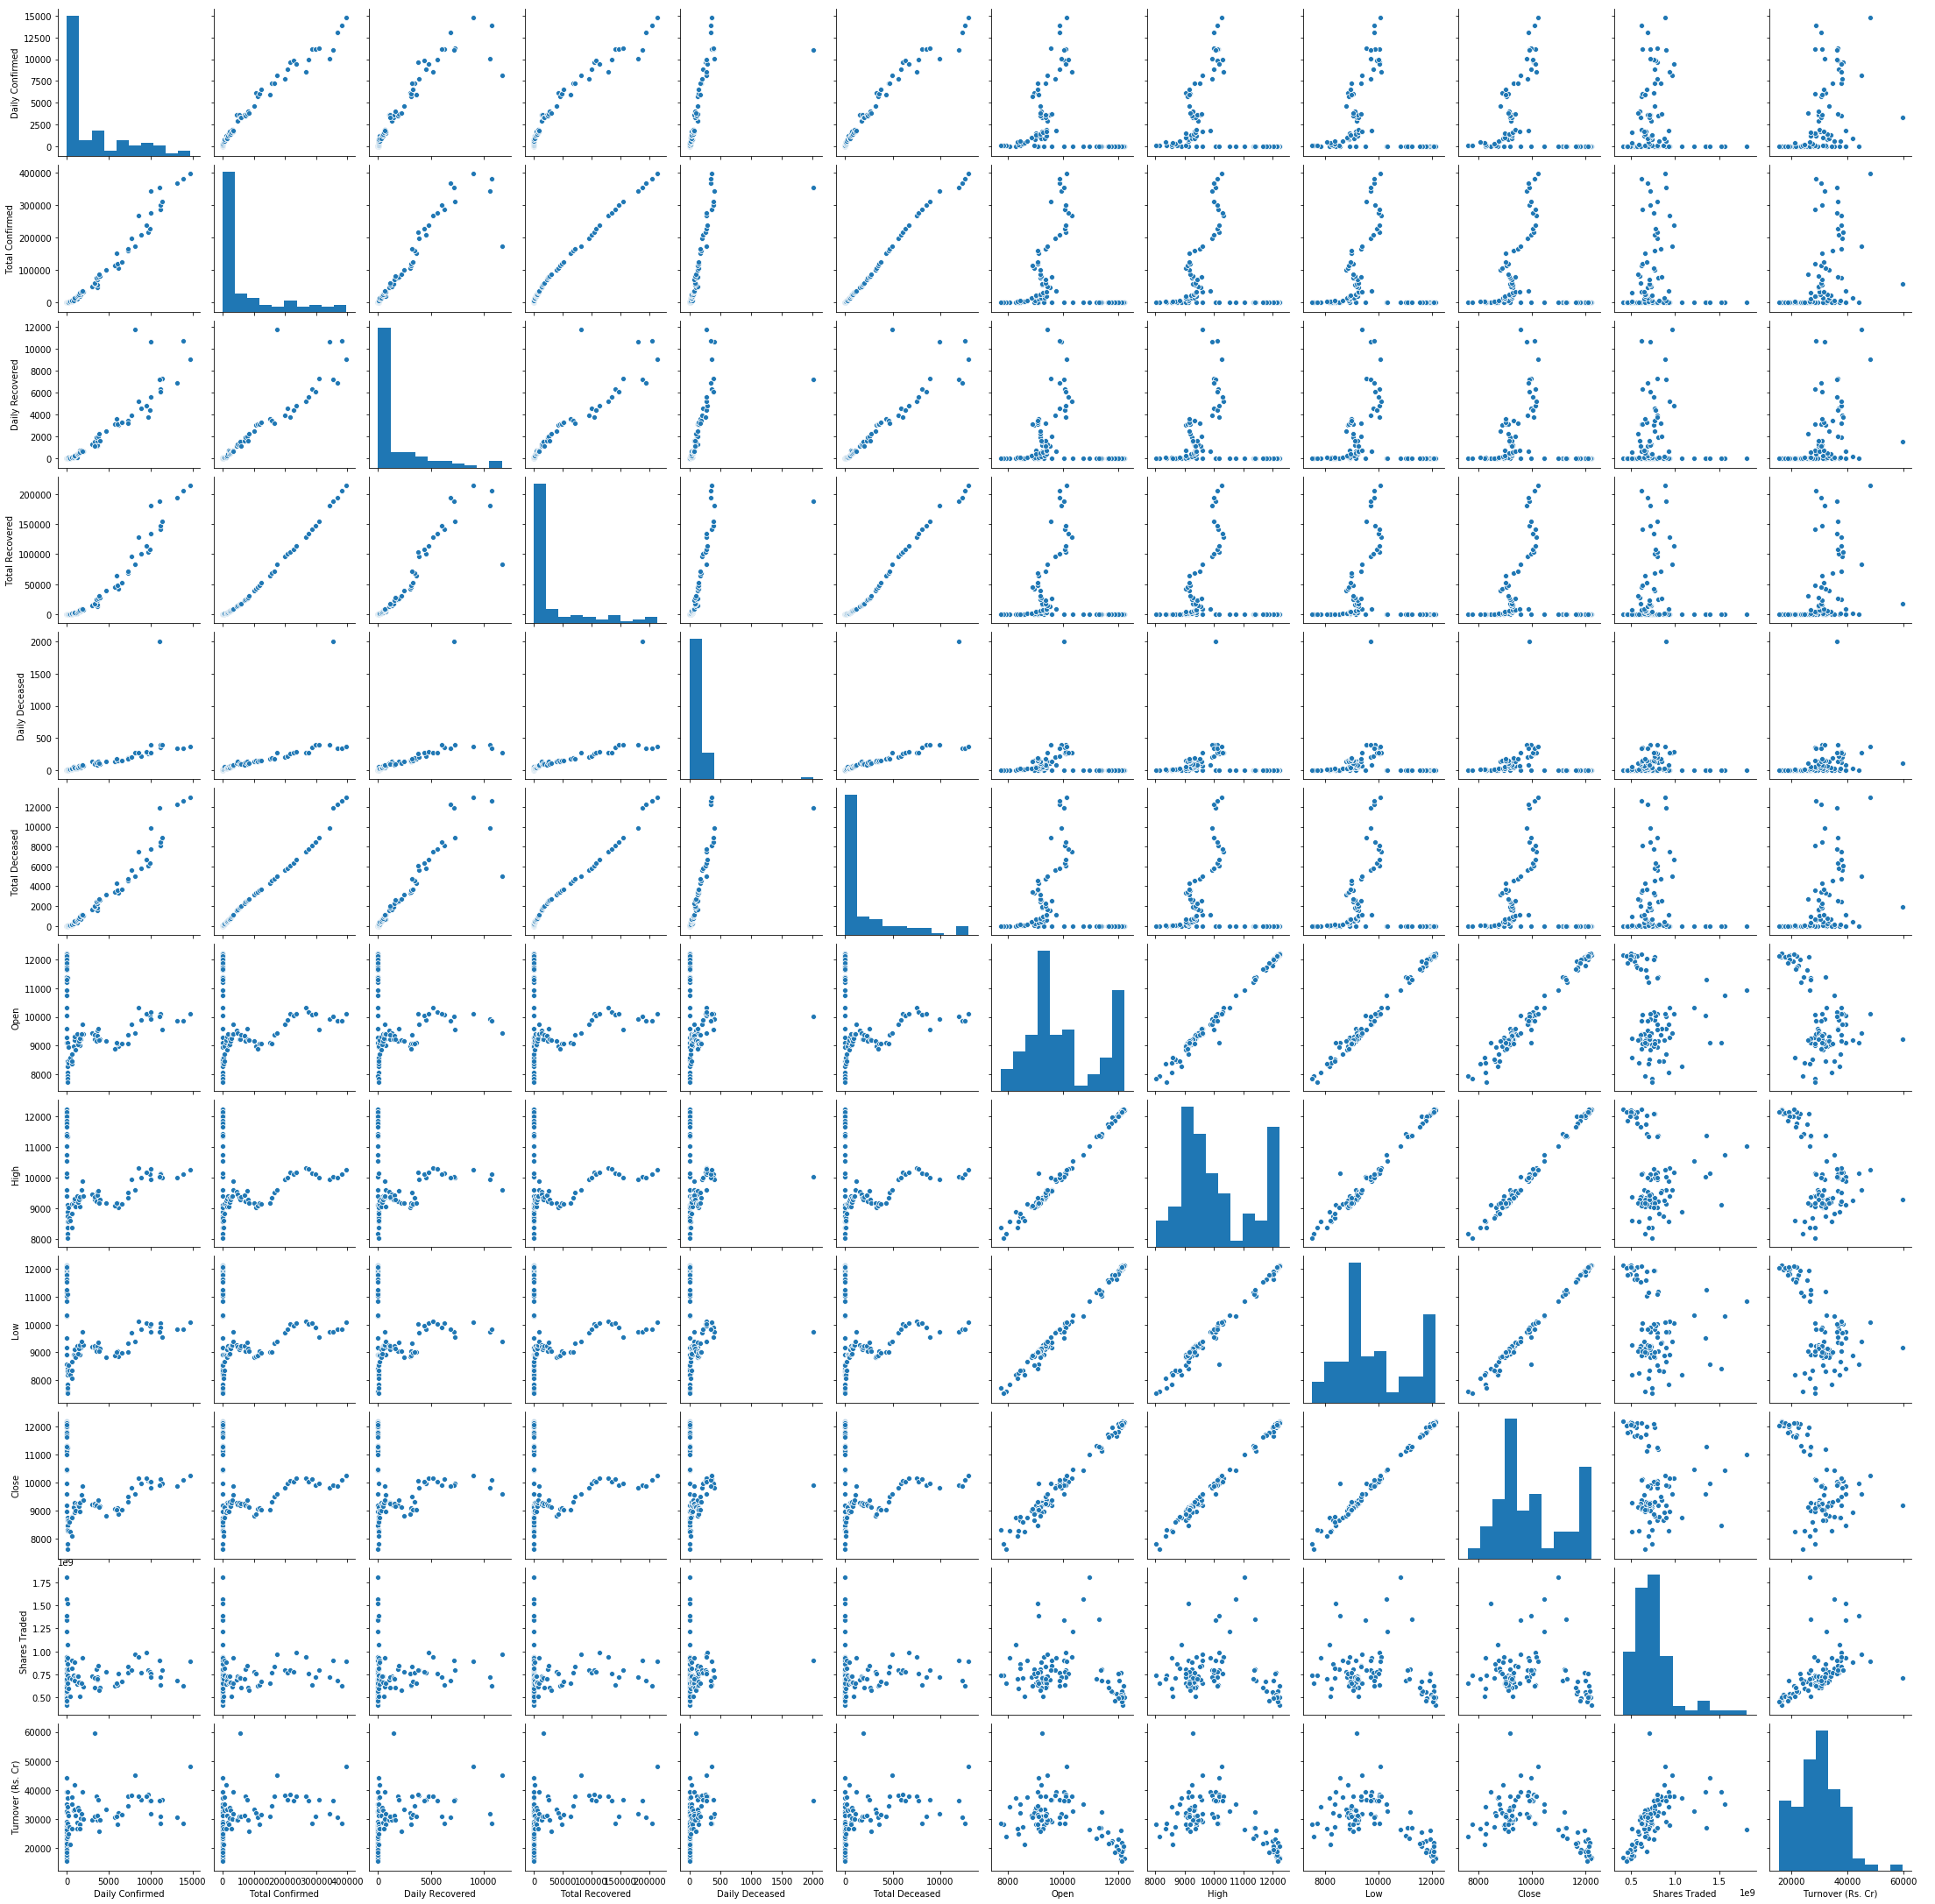

In [13]:
sns.pairplot(merged_df)

Let's import oil prices as well and see if that makes any sense - 

In [60]:
crude_oil_prices_df = pd.read_csv("brent-daily_csv.csv")

In [61]:
crude_oil_prices_df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Ok so the date is again in another format and the Prices are in dollars. Also We don't need that historical data. Anyways, just for fun let us plot this data.

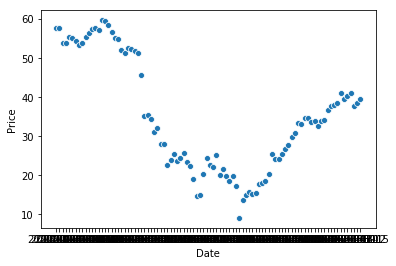

In [62]:
covid_crude_oil_price_df = crude_oil_prices_df[8301:]
#covid_crude_oil_price_df
sns.scatterplot(covid_crude_oil_price_df.Date, covid_crude_oil_price_df.Price)

In [63]:
def date_modify(x):
    x = x.split("-")
    dict_month = {"01":"Jan", "02":"Feb", "03":"Mar", "04":"Apr", "05":"May", "06":"Jun"}
    return x[2]+"-"+dict_month[x[1]]+"-"+x[0]

In [64]:
covid_crude_oil_price_df.Date = covid_crude_oil_price_df.Date.apply(lambda x: date_modify(x))
covid_crude_oil_price_df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Price
8301,30-Jan-2020,57.72
8302,31-Jan-2020,57.77
8303,03-Feb-2020,54.00
8304,04-Feb-2020,53.90
8305,05-Feb-2020,55.36
...,...,...
8390,09-Jun-2020,40.45
8391,10-Jun-2020,41.18
8392,11-Jun-2020,37.76
8393,12-Jun-2020,38.54


In [65]:
merge_financial_markets = pd.merge(covid_crude_oil_price_df, merged_df, how="inner", on="Date")
merge_financial_markets

,Date,Price,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,57.72,1,1,0,0,0,0,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,57.77,0,1,0,0,0,0,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,03-Feb-2020,54.00,1,3,0,0,0,0,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
3,04-Feb-2020,53.90,0,3,0,0,0,0,11786.25,11986.15,11783.40,11979.65,560430291,22338.50
4,05-Feb-2020,55.36,0,3,0,0,0,0,12005.85,12098.15,11953.35,12089.15,758032580,22998.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,09-Jun-2020,40.45,9981,276002,5634,134653,272,7749,10181.15,10291.15,10021.45,10046.65,754217460,36201.05
84,10-Jun-2020,41.18,11156,287158,6275,140928,358,8107,10072.60,10148.75,10036.85,10116.15,632383068,28485.47
85,11-Jun-2020,37.76,11135,298293,6044,146972,394,8501,10094.10,10112.05,9885.05,9902.00,715453486,30813.85
86,12-Jun-2020,38.54,11306,309599,7263,154235,388,8889,9544.95,9996.05,9544.35,9972.90,796306399,36505.77
